In [1]:
import sys
import numpy as np
import tensorflow as tf

In [ ]:
##
# class mymodel(tf.keras.Model):
#     def __init__(self,hidden,outputs,vocab_size,emb_size):
#         super(mymodel, self).__init__()
        
#         self.emb = tf.keras.layers.Embedding(vocab_size, emb_size)
#         self.hidden = tf.keras.layers.Dense(hidden, activation='relu')
#         self.outputs = tf.keras.layers.Dense(outputs, activation='sigmoid')
        
#     def call(self, inputs):
#         x = self.emb(inputs)
#         x = tf.reduce_mean(x, axis=1)
#         x = self.hidden(x)
#         x = self.outputs(x)
        
#         return x
    
# mynlp = mymodel(vocab_size, emb_size, hidden, outputs)

In [2]:
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
tfidf_vectorize = TfidfVectorizer()
tfidf_vectorize.fit(sent)

tfidf_vector = tfidf_vectorize.transform(sent)
tfidf_vectorize.vocabulary_

tfidf_vector = tfidf_vector.toarray()

In [7]:
print(tfidf_vector)

from sklearn.metrics.pairwise import cosine_similarity

[[0.         0.32412345 0.         0.         0.32412345 0.32412345
  0.32412345 0.32412345 0.32412345 0.32412345 0.         0.2306165
  0.32412345 0.2306165  0.         0.         0.2306165 ]
 [0.36469323 0.         0.36469323 0.36469323 0.         0.
  0.         0.         0.         0.         0.36469323 0.25948224
  0.         0.25948224 0.36469323 0.36469323 0.25948224]]


In [8]:
cosine_similarity(tfidf_vector[0:1], tfidf_vector[1:2])

array([[0.17952266]])

In [9]:
import glob

fix_path = 'C:/Users/82103/.keras/datasets/aclImdb'
tt_lists = ['/train', '/test']
pn_lists = ['/pos/','/neg/']

data ={}
for i in tt_lists:
    for j in pn_lists:
        path = fix_path +i +j+"*.*"
        
        data[i+j] = []
        
        file_lists = glob.glob(path)
        
        for k in file_lists:
            with open(k,'rt', encoding='utf-8') as f:
                data[i+j].append(f.read())

In [11]:
import pandas as pd

data_train_pos = pd.DataFrame(data['/train/pos/'], columns =['review'])
data_train_pos['sentiment'] = 1

data_train_neg = pd.DataFrame(data['/train/neg/'], columns =['review'])
data_train_neg['sentiment'] = 0

train_df = pd.concat([data_train_pos, data_train_neg], axis=0)

train_df.head()

review  sentiment
0  Bromwell High is a cartoon comedy. It ran at t...          1
1  Homelessness (or Houselessness as George Carli...          1
2  Brilliant over-acting by Lesley Ann Warren. Be...          1
3  This is easily the most underrated film inn th...          1
4  This is not the typical Mel Brooks film. It wa...          1

In [12]:
reviews = train_df['review']

print(reviews.shape)

(25000,)


In [15]:
tokenized_review = [r.split() for r in reviews]

In [16]:
tokenized_review_word = [len(t) for t in tokenized_review]
tokenized_review_char = [len(s.replace(" ","")) for s in reviews]

In [17]:
import matplotlib.pyplot as plt

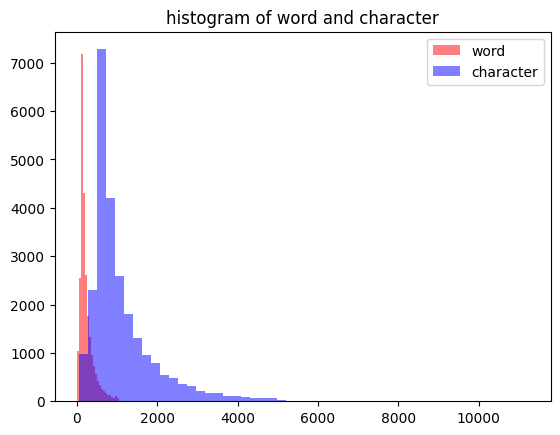

In [18]:
plt.hist(tokenized_review_word, bins=50, color='r', alpha=0.5, label='word')
plt.hist(tokenized_review_char, bins=50, color='b', alpha=0.5, label='character')
plt.title('histogram of word and character')
plt.legend()
plt.show()

In [20]:
def summary_token(x):
    print('문장의 최대 길이: {}'.format(np.max(x)))
    print('문장의 최소 길이: {}'.format(np.min(x)))
    print('문장의 평균 길이: {}'.format(np.mean(x)))
    print('문장의 중앙값의 길이: {}'.format(np.median(x)))
    print('문장의 1사분위 길이: {}'.format(np.percentile(x,25)))
    print('문장의 3사분위 길이: {}'.format(np.percentile(x,75)))
    
summary_token(tokenized_review_word)

문장의 최대 길이: 2470
문장의 최소 길이: 10
문장의 평균 길이: 233.7872
문장의 중앙값의 길이: 174.0
문장의 1사분위 길이: 127.0
문장의 3사분위 길이: 284.0


In [21]:
from wordcloud import WordCloud, STOPWORDS

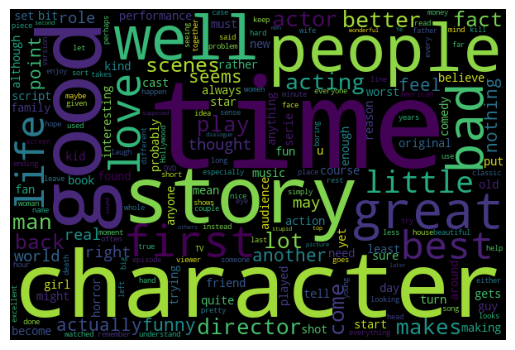

In [33]:
MYSTOPWORDS = list(STOPWORDS) + ['br','film','movie', 'see','know','seem','look','even','show','scene','think','one','thing','films',
                                'going','movies','made','say','end','got','never','find','many','much','live','go','alway','way','really',
                                'plot','word','work','watching','saw','though','almost','seen','watch','give','take','now','will',
                                'two','part','without','want','year','make','still','things','something']
MYSTOPWORDS = set(MYSTOPWORDS)

word_cloud = WordCloud(stopwords=MYSTOPWORDS, width=600, height=400)
word_cloud.generate(" ".join(reviews))

plt.figure()
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [23]:
import seaborn as sns

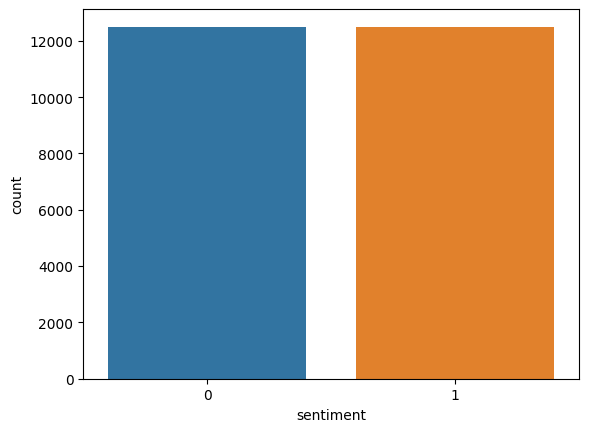

1    12500
0    12500
Name: sentiment, dtype: int64

In [26]:
sns.countplot(x='sentiment', data=train_df)
plt.show()

train_df['sentiment'].value_counts()

In [ ]:
# pd.read_csv('./.kaggle/data_in/word2vec-nlp-tutorial/')

In [37]:
train_df = pd.read_csv('./.kaggle/data_in/word2vec-nlp-tutorial/labeledTrainData.tsv',
                      header = 0, delimiter='\t', quoting=3)

In [41]:
train_df.head()
train_df['review'][1]

'"\\"The Classic War of the Worlds\\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells\' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \\"critics\\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \\"critics\\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells\' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \\"critics\\" perceive to be its shortcomings."'

In [42]:
print(train_df.shape)

(25000, 3)


In [54]:
## EDA

reviews = train_df['review']

## tokenizer
tokenized_review_word = [len(r.split()) for r in reviews] # word
tokenized_review_char = [len(c.replace(" ","")) for c in reviews] # character

In [55]:
print(tokenized_review_word[:10])
print(tokenized_review_char[:10])

[433, 158, 378, 379, 367, 89, 112, 132, 163, 43]
[1872, 791, 2074, 1869, 1867, 355, 496, 599, 803, 202]


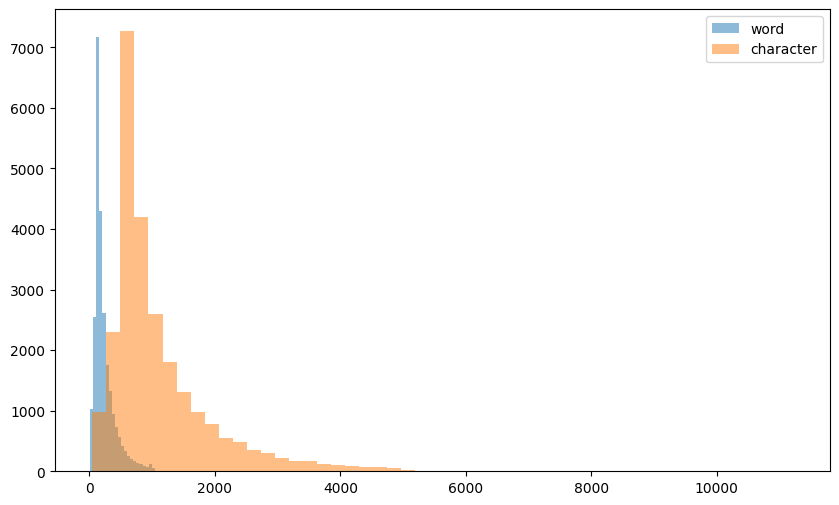

In [56]:
plt.figure(figsize=(10,6))
plt.hist(tokenized_review_word, bins=50, alpha=0.5, label='word')
plt.hist(tokenized_review_char, bins=50, alpha=0.5, label='character')
plt.legend()
plt.show()

In [57]:
summary_token(tokenized_review_word)

문장의 최대 길이: 2470
문장의 최소 길이: 10
문장의 평균 길이: 233.78824
문장의 중앙값의 길이: 174.0
문장의 1사분위 길이: 127.0
문장의 3사분위 길이: 284.0


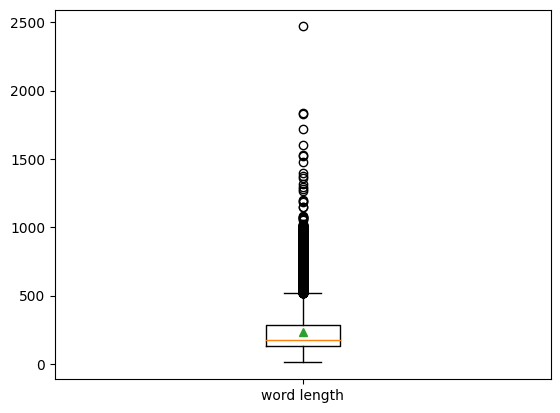

In [58]:
plt.boxplot(tokenized_review_word, labels=['word length'],showmeans=True)
plt.show()

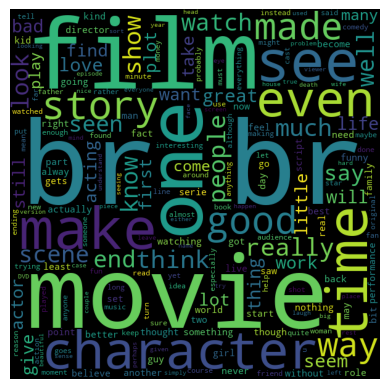

In [60]:
bag_wordcloud = WordCloud(stopwords=STOPWORDS, height=600, width=600)
bag_wordcloud.generate(" ".join(reviews))

plt.figure()
plt.imshow(bag_wordcloud)
plt.axis('off')
plt.show()

In [64]:
df = pd.DataFrame([[1,2],[3,4]], columns=['A','B'])

def add_one(x):
    x +=1
    return x

df['A'].apply(add_one)  # pandas method

df['B'].apply(lambda x: x+1) # python built-in function

0    3
1    5
Name: B, dtype: int64

In [66]:
train_df.head()

id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...

In [70]:
'?' in train_df['review'][0] ## pyhton
'?' in train_df['review'][1]

False

In [87]:
qmark = np.mean(train_df['review'].apply(lambda x: '?' in x))
fullstop = np.mean(train_df['review'].apply(lambda x: '.' in x))
captial_first = np.mean(train_df['review'].apply(lambda x: x[1].isupper()))
captial = np.mean(train_df['review'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_df['review'].apply(lambda x: max([y.isdigit() for y in x])))

물음표가 있는 질문: 29.55%


In [89]:
print('물음표가 있는 질문: {:.2f}%'.format(qmark*100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop*100))
print('첫문장이 대문자가 있는 질문: {:.2f}%'.format(captial_first*100))
print('대문자가 있는 질문: {:.2f}%'.format(captial*100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers*100))

물음표가 있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫문장이 대문자가 있는 질문: 92.84%
대문자가 있는 질문: 99.59%
숫자가 있는 질문: 56.66%


In [90]:
import re
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [91]:
html_text = \
'''
<p> O’er all the hilltops<br>
    Is quiet now,<br>
    In all the treetops<br>
    Hearest thou<br>
    Hardly a breath;<br>
    The birds are asleep in the trees:<br>
    Wait, soon like these<br>
    Thou too shalt rest.
</p>
'''

In [97]:
!pip install html5lib

  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)


In [101]:
print('html_text',html_text)

html_text_soup = BeautifulSoup(html_text,'html').get_text()

# html_text_soup
re.sub('[^a-zA-Z]'," ",html_text_soup)

html_text 
<p> O’er all the hilltops<br>
    Is quiet now,<br>
    In all the treetops<br>
    Hearest thou<br>
    Hardly a breath;<br>
    The birds are asleep in the trees:<br>
    Wait, soon like these<br>
    Thou too shalt rest.
</p>



' O er all the hilltops     Is quiet now      In all the treetops     Hearest thou     Hardly a breath      The birds are asleep in the trees      Wait  soon like these     Thou too shalt rest   '

In [105]:
review = train_df['review'][0]
# print(review)

review_text = BeautifulSoup(review, 'html').get_text()
review_text = re.sub('[^a-zA-Z]',' ', review_text)
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [118]:
len(stopwords.words('english'))
print(type(stopwords.words('english')))

stop_words = set(stopwords.words('english'))
# stop_words = stopwords + ['']


<class 'list'>


In [120]:
# print(review_text)
review_text = review_text.lower()

splitted_words = review_text.split()
# print(splitted_words)

words = [w for w in splitted_words if w not in stop_words]
# print(words)

clean_review = " ".join(words)
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [121]:
def preprocessing(review, remove_stopwords = False):
    
    review_text = BeautifulSoup(review, 'html').get_text()  # html tag remove
    
    review_text = re.sub('[^a-zA-Z]',' ', review_text) # 특수 문자 제거
    
    words = review_text.lower().split()
    
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        words = [w for w in words if w not in stops]
        clean_review = " ".join(words)
        
    else:
        clean_review = " ".join(words)
        
    return clean_review

In [122]:
clean_train_reviews = []

for review in train_df['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords=True))

C:\Users\82103\anaconda3\envs\py3.8\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [125]:
len(clean_train_reviews)

25000

In [127]:
print(type(clean_train_reviews))
clean_train_dict = {
    'review': clean_train_reviews,
    'sentiment': train_df['sentiment']
}

clean_train_df = pd.DataFrame(clean_train_dict)
clean_train_df.head()

<class 'list'>


review  sentiment
0  stuff going moment mj started listening music ...          1
1  classic war worlds timothy hines entertaining ...          1
2  film starts manager nicholas bell giving welco...          0
3  must assumed praised film greatest filmed oper...          0
4  superbly trashy wondrously unpretentious explo...          1

In [129]:
##
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(clean_train_df['review'])
text_sequences = tokenizer.texts_to_sequences(clean_train_df['review'])
tokenizer.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [134]:
# text_sequences[1]
vocab_word = tokenizer.word_index
print(type(vocab_word))
vocab_word['<PAD>'] = 0

<class 'dict'>


In [137]:
data_configs = {}

data_configs['vocab'] = vocab_word
data_configs['vocab_size'] =len(vocab_word)

print(data_configs.keys())

dict_keys(['vocab', 'vocab_size'])


In [139]:
print(data_configs['vocab'])
print(data_configs['vocab_size'])

{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'things': 79, 'p

In [144]:
train_inputs = tf.keras.preprocessing.sequence.pad_sequences(text_sequences,
                                                            maxlen = 174,
                                                            padding = 'pre',
                                                            truncating = 'pre')

print(train_inputs.shape)

(25000, 174)


In [146]:
train_inputs[0]
train_inputs[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
         232,   203,  3048,  3565,  7116,   317,     2,   405,   153,
          19,   634, 10967, 11898,  8816,  1653,  1035,  3494,   232,
         154,   314,  7116,  2701,   178,     2,  2349,    87,  1111,
         582,   217,  2219,   149,    73,   160,   626,  1035,  2882,
         194,   642,

In [147]:
train_label = train_df['sentiment']

In [150]:
np.save('./.kaggle/data_in/train_input.npy', train_inputs)
np.save('./.kaggle/data_in/train_label.npy', train_label)

json.dump(data_configs, open('./.kaggle/data_in/data_configs.json','w'),
         ensure_ascii=False)

In [190]:
clean_train_df.to_csv('./.kaggle/data_in/clean_train_data.csv', index=False)

In [173]:
test_df = pd.read_csv('./.kaggle/data_in/word2vec-nlp-tutorial/testData.tsv',
                      header = 0, delimiter='\t', quoting=3)

In [174]:
test_df.head()

id                                             review
0  "12311_10"  "Naturally in a film who's main themes are of ...
1    "8348_2"  "This movie is a disaster within a disaster fi...
2    "5828_4"  "All in all, this is a movie for kids. We saw ...
3    "7186_2"  "Afraid of the Dark left me with the impressio...
4   "12128_7"  "A very accurate depiction of small time mob l...

In [175]:
clean_test_reviews = []

for review in test_df['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords=True))

C:\Users\82103\anaconda3\envs\py3.8\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [176]:
clean_test_reviews

['naturally film main themes mortality nostalgia loss innocence perhaps surprising rated highly older viewers younger ones however craftsmanship completeness film anyone enjoy pace steady constant characters full engaging relationships interactions natural showing need floods tears show emotion screams show fear shouting show dispute violence show anger naturally joyce short story lends film ready made structure perfect polished diamond small changes huston makes inclusion poem fit neatly truly masterpiece tact subtlety overwhelming beauty',
 'movie disaster within disaster film full great action scenes meaningful throw away sense reality let see word wise lava burns steam burns stand next lava diverting minor lava flow difficult let alone significant one scares think might actually believe saw movie even worse significant amount talent went making film mean acting actually good effects average hard believe somebody read scripts allowed talent wasted guess suggestion would movie start 

In [183]:
test_vector = tokenizer.texts_to_sequences(clean_test_reviews)
test_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_vector,
                                                              maxlen=174,
                                                              padding='pre',
                                                              truncating='pre')
test_id = test_df['id'].str.replace('"','')

In [184]:
text_sequences

[[1795,
  2,
  175,
  1170,
  14713,
  4451,
  1776,
  2885,
  259,
  1604,
  989,
  410,
  770,
  643,
  995,
  517,
  86,
  14554,
  40732,
  2,
  141,
  236,
  907,
  5368,
  1661,
  26,
  244,
  1560,
  1367,
  5096,
  1076,
  650,
  238,
  23985,
  1508,
  40,
  1260,
  3606,
  40,
  925,
  5539,
  40,
  13070,
  430,
  40,
  2405,
  1795,
  10771,
  226,
  9,
  6784,
  2,
  1462,
  20,
  2252,
  278,
  4704,
  3389,
  266,
  1287,
  5706,
  67,
  6841,
  4671,
  1024,
  5822,
  247,
  835,
  22851,
  4064,
  3831,
  771],
 [1,
  1524,
  599,
  1524,
  2,
  244,
  19,
  97,
  49,
  3046,
  1241,
  133,
  168,
  485,
  164,
  11,
  538,
  1372,
  16126,
  2514,
  6238,
  2514,
  612,
  252,
  16126,
  19946,
  1244,
  16126,
  2788,
  729,
  164,
  446,
  2519,
  3,
  2425,
  25,
  125,
  66,
  147,
  109,
  1,
  7,
  306,
  2519,
  1008,
  531,
  307,
  120,
  2,
  257,
  35,
  66,
  5,
  183,
  700,
  140,
  147,
  1625,
  212,
  2999,
  1502,
  531,
  897,
  353,
  5710,
  8,
  

In [185]:
np.save('./.kaggle/data_in/test_input.npy', test_sequences)
np.save('./.kaggle/data_in/test_id.npy',test_id)

In [186]:
test_dict = {'reviews':clean_test_reviews,
            'id':test_id}
clean_test_df = pd.DataFrame(test_dict)
clean_test_df.to_csv('./.kaggle/data_in/test_clean.csv', index=False)

In [191]:
## Logistic regression

In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [193]:
DATA_IN_PATH = './.kaggle/data_in/'
DATA_OUT_PATH = './.kaggle/data_out/'

In [195]:
train_data = pd.read_csv('./.kaggle/data_in/clean_train_data.csv',header=0, sep=',')
train_data.head()

review  sentiment
0  stuff going moment mj started listening music ...          1
1  classic war worlds timothy hines entertaining ...          1
2  film starts manager nicholas bell giving welco...          0
3  must assumed praised film greatest filmed oper...          0
4  superbly trashy wondrously unpretentious explo...          1

In [196]:
reviews = train_data['review']
sentiments = train_data['sentiment']

In [203]:
tfidf_vectorize = TfidfVectorizer(analyzer='char', min_df=0, ngram_range=(1,3), max_features=5000)
tfidf_vectorize.fit(reviews)

X = tfidf_vectorize.transform(reviews)
y = np.array(sentiments)

In [207]:
# print(X.toarray().shape)
# tfidf_vectorize.vocabulary_.keys()
X.toarray()

array([[0.52387043, 0.01984267, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.44483351, 0.01659524, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4552448 , 0.03538852, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.50386451, 0.04483308, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45402573, 0.01434559, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47992151, 0.02573252, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [211]:
X_train.shape
print(type(X_train))

<class 'scipy.sparse._csr.csr_matrix'>


In [212]:
from sklearn.model_selection import cross_validate

lgs = LogisticRegression(max_iter=1000)
# lgs.fit(X_train, y_train)

In [214]:
score = cross_validate(lgs, X_train, y_train, cv=5)

print(score['test_score'])

[0.82275 0.83475 0.8285  0.82925 0.83225]


In [215]:
lgs.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [216]:
lgs.score(X_test, y_test)

0.8216

In [217]:
test_data = pd.read_csv('./.kaggle/data_in/test_clean.csv', header=0, sep=',')

In [220]:
test_vector = tfidf_vectorize.transform(test_data['reviews'])
test_vector.shape

(25000, 5000)

In [221]:
test_predicted = lgs.predict(test_vector)
print(test_predicted)

[1 0 1 ... 1 1 0]


In [223]:
len(test_predicted)

25000

In [224]:
answer_dict ={'id':test_data['id'],
             'sentiment':test_predicted}
submit_data = pd.DataFrame(answer_dict)
submit_data.head()

id  sentiment
0  12311_10          1
1    8348_2          0
2    5828_4          1
3    7186_2          0
4   12128_7          1

In [225]:
submit_data.to_csv('./.kaggle/data_out/lgs_tfidf_answer.csv', index=False)